# EDA

Possible interesting questions are:
- Ratio of likes-dislikes in different categories?
- Users like videos from which category more?
- Top 5 videos that are on trending in each country?
- Is the most liked video also the most trending video?
- Maximum number of days to trending status for a video?
- Users like videos from which category more?
- Users comment on which category the most?
- Frequently occurring words in tags and description

## Import libraries

In [12]:
import numpy as np
import pandas as pd
import re   #RE = regular expression https://docs.python.org/3/library/re.html  -> the functions in this module let you check if a particular string matches a given regular expression -> Used to perform string analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  #It is a Python data visualization library based on matplotlib and provides high-level interface for drawing attractive and informative statistical graphics (https://seaborn.pydata.org/ )
from matplotlib import cm  #cm stands for colormap
from datetime import datetime
import glob   #is a module that finds pathnames matching a specified pattern according to the rules of the Unix shell (e.g. the *)
import os
import json
import pickle #it is a module that implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation
#import six
sns.set()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.options.mode.chained_assignment=None  #Ignores warning coming out when working on slices of dataframes

## Import saved pickled files

Let's first import our saved combined pickled file:

In [13]:
combined_df = pd.read_pickle('./Data_cleaned/CombinedVideos.pkl', compression='infer')

In [14]:
combined_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_date,publish_timestamp,category
video_id,,,,,,,,,,,,,,,,,,,
4YFo4bdMO8Q,2018-06-14,KYLE - Ikuyo feat. 2 Chainz & Sophia Black [A...,SuperDuperKyle,10,2018-05-11 04:06:35,"Kyle|""SuperDuperKyle""|""Ikuyo""|""2 Chainz""|""Soph...",607552,18271,274,1423,https://i.ytimg.com/vi/4YFo4bdMO8Q/default.jpg,False,False,False,Debut album 'Light of Mine' out now: http://ky...,GB,2018-05-11,04:06:35,Music
L_cxNGfEd_0,2018-06-14,CLASSE PAS CLASSE - PAROLE DE CHAT,Parole de chat,15,2018-06-13 10:54:55,"classe|""pas classe""|""parole""|""parole de chat""|...",186468,28742,233,2168,https://i.ytimg.com/vi/L_cxNGfEd_0/default.jpg,False,False,False,"Classe pas classe, hommage aux Robins des bois...",FR,2018-06-13,10:54:55,Pets & Animals
ENVlcPpTuh4,2018-06-14,"[ì í2018, íì¸í¡í¡] ìë¬´ë¦¬ ì§ë¬¸ì´...",MBCNEWS,25,2018-06-13 14:56:22,"MBC|""MBCë´ì¤""|""ë´ì¤ë°ì¤í¬""|""newsdesk""|""...",836427,2254,801,3551,https://i.ytimg.com/vi/ENVlcPpTuh4/default.jpg,False,False,False,"ì í2018, 6.13ì§ë°©ì ê±°, ê°íë°©ì¡, ì...",KR,2018-06-13,14:56:22,News & Politics
5BeWvP521s8,2018-06-14,The genetic test result for the Dog Mother-Cat...,SBS TVëë¬¼ëì¥xì ëë©ë´,15,2018-06-12 08:00:02,"ì ëë©ë´|""ëë¬¼ëì¥""|""TVëë¬¼ëì¥""|""...",656898,5222,225,821,https://i.ytimg.com/vi/5BeWvP521s8/default.jpg,False,False,False,The unbelievable result baffled the entire nei...,KR,2018-06-12,08:00:02,Pets & Animals
nOUlB0i2MaA,2018-06-14,2018 êµ­ë¯¼ì ì í - ì ê±°ë°©ì¡ 'ìì ê...,SBS ë´ì¤,25,2018-06-13 19:10:31,"ë´ì¤|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188,0,0,175,https://i.ytimg.com/vi/nOUlB0i2MaA/default.jpg,False,True,False,'ì ê±°ë°©ì¡ì ëª ê°' SBSê° ì¨ë¤! SBSê°...,KR,2018-06-13,19:10:31,News & Politics


Let's check for unique values in the country column so to load also the single pickled dataframes recursively:

In [15]:
country_names = combined_df['country'].unique()

In [17]:
all_dataframes = []
for country_name in country_names:
    file_name = './Data_cleaned/'+country_name+'videos.pkl'
    df = pd.read_pickle(file_name,compression='infer')
    all_dataframes.append(df)

## Ratio of like-dislike in the different categories

In [18]:
#Let's check again what data we have at our disposal
print(combined_df.keys())

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'publish_date',
       'publish_timestamp', 'category'],
      dtype='object')


In [19]:
#let's sum the number of likes in the different categories and similar for the number of dislikes and compute the ratio
ratio_by_cat = combined_df.groupby('category')['likes'].sum()/combined_df.groupby('category')['dislikes'].sum()
#Let's then define a new dataframe with the results
ratio_df = pd.DataFrame({'category': ratio_by_cat.index,'ratio':ratio_by_cat.values})
ratio_df.head()

,category,ratio
0,Autos & Vehicles,17.929587
1,Comedy,19.353268
2,Education,23.539022
3,Entertainment,14.350615
4,Film & Animation,18.725356


Let's sort the `ratio_df` dataframe and plot the results:

In [21]:
ratio_df.sort_values(by='ratio', ascending=False,inplace=True)
ratio_df.head()

,category,ratio
12,Pets & Animals,35.350593
6,Howto & Style,26.456860
2,Education,23.539022
5,Gaming,22.861545
8,Music,21.105993


<Axes: xlabel='ratio', ylabel='category'>

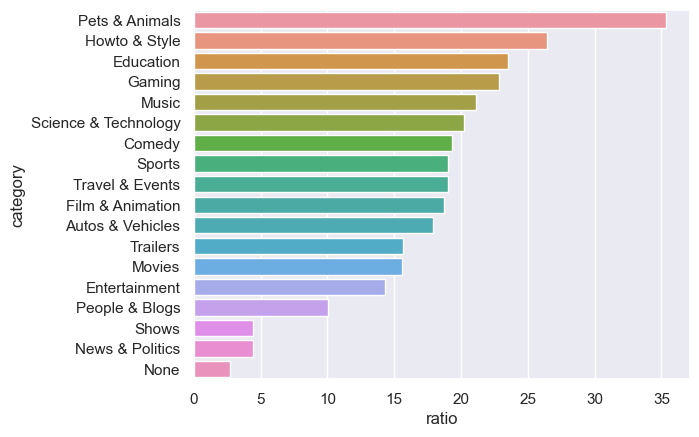

In [22]:
#Let's plot the results using seaborn 
sns.barplot(x= ratio_df['ratio'],y=ratio_df['category'])

### Reflection

In almost all cases (apart from the categories *Shows* and *News & Politics*) the number of likes is one order of magnitude higher than the number of dislikes (being the ratio higher than ten). The category for which the ratio likes-dilikes is maximimum is the *Pets & Animals* category.

From this we can infer that people are less divided on the content of videos based on entertainment than compared to topics such as news, whose content can lead to a division of opinions among the user.

## Which category has more likes?

To answer this question, we have to first to group again the `combined_df` by `category` and then sort according to `likes`

In [25]:
likes_by_cat = combined_df.groupby('category')['likes'].sum()
df_likes_by_cat = pd.DataFrame({'category':likes_by_cat.index, 'n_likes':likes_by_cat.values})
df_likes_by_cat = df_likes_by_cat.sort_values(by='n_likes',ascending=False, ignore_index=True)
df_likes_by_cat.head()

,category,n_likes
0,Entertainment,471875260
1,Music,444810351
2,Comedy,218752102
3,People & Blogs,157767436
4,Howto & Style,77250724


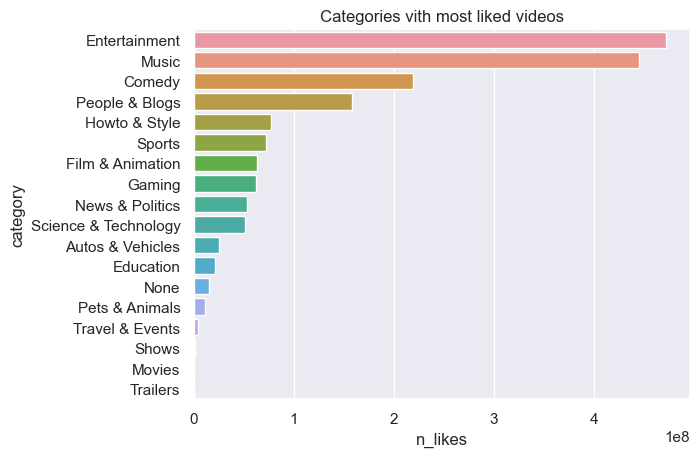

In [26]:
#Plotting the results
sns.barplot(x= df_likes_by_cat['n_likes'],y=df_likes_by_cat['category']).set(title='Categories vith most liked videos');

### Reflection

As it can be inferred from the upper graph, the categories with the largest number of likes are the *Entertainment* and *Music*, potentially meaning that users usually prefer using this platform for recreational purposes.

### Analysis per country

Another possible interesting question is: *is the observed trend is the same in all the countries or is the category with most likes different in the different countries?*

To answer this question, let's redo the same analysis for the single dataframes (the reason why we do not use the combined dataframe and then just plot per country is that in the data cleaning steps we have removed duplicates of videos, so this dataframe would not give an accurate representation).

In [36]:
all_df_likes = []
for df in all_dataframes:
    s_likes_by_cat = df.groupby('category')['likes'].sum()
    sdf_likes_by_cat = pd.DataFrame({'category':s_likes_by_cat.index, 'n_likes':s_likes_by_cat.values, 'country':[df.country.unique()]*len(s_likes_by_cat)})
    sdf_likes_by_cat = sdf_likes_by_cat.sort_values(by='n_likes',ascending=False, ignore_index=True)
    all_df_likes.append(sdf_likes_by_cat)

In [46]:
all_df_likes[1].head()

,category,n_likes,country
0,Music,277314234,[FR]
1,Comedy,130805444,[FR]
2,Entertainment,118243560,[FR]
3,Sports,43964560,[FR]
4,People & Blogs,28927705,[FR]


In [48]:
#Let's print the first category for every country
for df in all_df_likes:
    display(df.head(2))

,category,n_likes,country
0,Music,3742993052,[GB]
1,Entertainment,744266231,[GB]


,category,n_likes,country
0,Music,277314234,[FR]
1,Comedy,130805444,[FR]


,category,n_likes,country
0,Music,240239454,[KR]
1,Entertainment,88234195,[KR]


,category,n_likes,country
0,Music,120129951,[RU]
1,Entertainment,98904908,[RU]


,category,n_likes,country
0,Music,83596720,[JP]
1,Entertainment,39741269,[JP]


,category,n_likes,country
0,Music,564447530,[CA]
1,Entertainment,387245433,[CA]


,category,n_likes,country
0,Entertainment,396146637,[IN]
1,Music,254328536,[IN]


,category,n_likes,country
0,Music,227013300,[MX]
1,Entertainment,186692595,[MX]


,category,n_likes,country
0,Music,1416838584,[US]
1,Entertainment,530516491,[US]


,category,n_likes,country
0,Music,300297066,[DE]
1,Entertainment,267752272,[DE]


As it can be observed, a part from India, in all the other countries the most liked category is the *Music* one, followed by the *Entertainment* one.

## Number of trending videos per category

Let's go back to analysing the combined dataset, and let's see how many videos are trending in each category

In [58]:
n_videos = combined_df.groupby('category')['category'].value_counts().sort_values(ascending=False)
n_videos

category
Entertainment           52916
People & Blogs          33255
News & Politics         22184
Sports                  13542
Comedy                  10729
Music                   10528
Howto & Style            9744
Film & Animation         9230
Gaming                   5582
Education                4085
Science & Technology     3469
Autos & Vehicles         3409
Pets & Animals           2330
None                     1984
Travel & Events           849
Shows                     436
Movies                     12
Trailers                    3
Name: count, dtype: int64

The category with the highest number of trending videos is *Entertainment* followed by *People & Blogs*.

## What are the top 5 videos trending in each country?

By trending we mean the 5 videos with the most number of views per country.

**NB:** Again, it is important that we use the single dataframes as in `combined_df` we have removed duplicates existing between different countries. And, for example, the video with id `7C2z4GqqS5E` is seen *only* as a video from GB and not JP, where it is instead the most trending video

In [59]:
temporary_views = []
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['views'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are on trending
    temporary_views.append(temp)
# Printing 3 randomly selected countries
for i in range(len(temporary_views)):
    display(temporary_views[i][['title', 'channel_title', 'category', 'views', 'likes','country']])

,title,channel_title,category,views,likes,country
video_id,,,,,,
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,424538912,2818771,GB
9jI-z9QN6g8,"Te Bote Remix - Casper, Nio GarcÃ­a, Darell, N...",Flow La Movie,Music,337621571,2581961,GB
kLpH1nSLJSs,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,328860380,3823879,GB
wfWkmURBNv8,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,Music,288811992,1618180,GB
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,259721696,5444541,GB


,title,channel_title,category,views,likes,country
video_id,,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,100911567,2656682,FR
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,65396157,4750254,FR
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,60776509,2183745,FR
TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Ãchame La Culpa",LuisFonsiVEVO,Music,47078714,1763400,FR
BhIEIO0vaBE,To Our Daughter,Kylie Jenner,People & Blogs,44818108,0,FR


,title,channel_title,category,views,likes,country
video_id,,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,113876217,2811223,KR
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,87450245,2584675,KR
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,87430865,5150839,KR
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,73432600,2478908,KR
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,49185287,1204868,KR


,title,channel_title,category,views,likes,country
video_id,,,,,,
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,62796390,4470923,RU
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,52611730,1891836,RU
BhIEIO0vaBE,To Our Daughter,Kylie Jenner,People & Blogs,35832484,0,RU
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,31648454,1405392,RU
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,27973210,850378,RU


,title,channel_title,category,views,likes,country
video_id,,,,,,
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,62796390,4470923,JP
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,39128403,1077732,JP
QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,30180849,1242239,JP
32sYGCOYJUM,CHáº Y NGAY ÄI | RUN NOW | SÆ N TÃNG M-TP | ...,SÆ¡n TÃ¹ng M-TP Official,Music,27470728,753626,JP
tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,24262331,1249417,JP


,title,channel_title,category,views,likes,country
video_id,,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,137843120,3014479,CA
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,98938809,3037318,CA
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,89930713,2606665,CA
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,80738011,5053338,CA
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,61163906,629164,CA


,title,channel_title,category,views,likes,country
video_id,,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,125432237,2912710,IN
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,89930713,2606663,IN
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,53822757,1250535,IN
QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,45064699,1494997,IN
rRr1qiJRsXk,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,Entertainment,44171797,780895,IN


,title,channel_title,category,views,likes,country
video_id,,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,100912384,2656698,MX
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,74789251,2444976,MX
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,62796390,4470923,MX
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,50896717,550478,MX
#NAME?,Maluma - El PrÃ©stamo (Official Video),MalumaVEVO,Music,44726356,575878,MX


,title,channel_title,category,views,likes,country
video_id,,,,,,
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,225211923,5023450,US
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,149376127,3093544,US
ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,148689896,3094021,US
zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,Music,139334502,1425496,US
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,123010920,5613827,US


,title,channel_title,category,views,likes,country
video_id,,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,113876217,2811217,DE
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,80360459,2513103,DE
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,73463137,4924056,DE
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,73432600,2478908,DE
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,50896717,550476,DE


As it can be seen, in all countries, viewers mostly prefer videos belonging to the `Music` and `Entertainment` categories. This potentially confirms what we said before that the users use the YT platform mainly for recreational purposes.

## Is the most liked video also the most trending video?

To answer this question, we need to compare the videos with the largest number of likes to those with the largest number of views.

In [60]:
temporary_likes=[]
for df in all_dataframes:
    temp1 = df
    temp1 = temp1.reset_index().sort_values(by=['likes'], ascending=False)
    temp1.drop_duplicates(subset="video_id",keep='first',inplace=True)
    temp1.set_index('video_id',inplace=True)
    temp1 = temp1.head(5)
    temporary_likes.append(temp1)
    
#for i in range(len(temporary_likes)):
#    display(temporary_likes[i][['likes','views','country']])

Let's try to merge the two results dataframes and dropping duplicates, we can see if the number of entries in the merged dataframe is larger or not than 5. 

If it is larger, then the most liked videos and the most trending videos do not match.

In [61]:
temporary_merged = []
for i in range(len(temporary_likes)):
    temporary_merged.append(pd.concat([temporary_views[i],temporary_likes[i]],join='outer'))

for i in range(len(temporary_likes)):
    temporary_merged[i] = temporary_merged[i].drop_duplicates(keep='first')
    if len(temporary_merged[i])>5:
        print('In ' + temporary_merged[i]['country'].iloc[0]+ ' the most liked videos and the most trending videos do not match.' )


In GB the most liked videos and the most trending videos do not match.
In FR the most liked videos and the most trending videos do not match.
In KR the most liked videos and the most trending videos do not match.
In RU the most liked videos and the most trending videos do not match.
In JP the most liked videos and the most trending videos do not match.
In CA the most liked videos and the most trending videos do not match.
In IN the most liked videos and the most trending videos do not match.
In MX the most liked videos and the most trending videos do not match.
In US the most liked videos and the most trending videos do not match.
In DE the most liked videos and the most trending videos do not match.


## What is the maximum number of days to trending status for a video?

To see how long it takes for a video to become trending, we need to analyze the amount of time passed between the publication date and the trending date.

In [62]:
temporary = []
for df in all_dataframes:
    temp=df
    temp['timespan'] = (temp['trending_date'] - temp['publish_date']).dt.days
    temporary.append(temp)
    

#to check what we did is correct, let's display one dataset
display(temporary[4][['trending_date','publish_date','timespan']].head())

,trending_date,publish_date,timespan
video_id,,,
5ugKfHgsmYw,2018-02-07,2018-02-06,1
ohObafdd34Y,2018-02-07,2018-02-06,1
aBr2kKAHN6M,2018-02-07,2018-02-06,1
5wNnwChvmsQ,2018-02-07,2018-02-06,1
B7J47qFvdsk,2018-02-07,2018-02-06,1


Let's now plot our results.
The first thing we have to do is however to group the videos by their id, so that for a video we have only one result.

In [63]:
to_trending = []
for i in range(0,len(temporary)):
    to_trending.append(temporary[i].groupby('video_id').timespan.max())

<Axes: xlabel='count', ylabel='Count'>

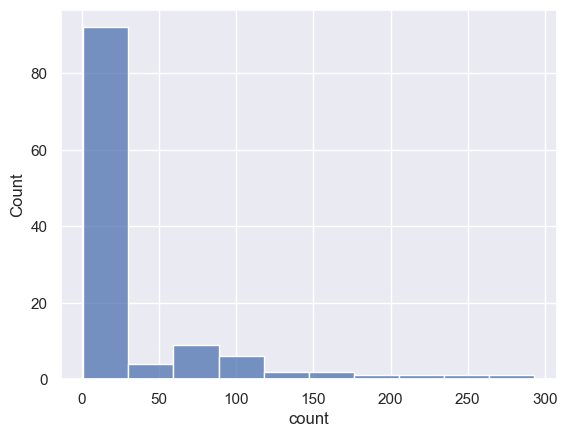

In [64]:
sns.histplot(to_trending[0].value_counts(),bins='rice',kde=False)

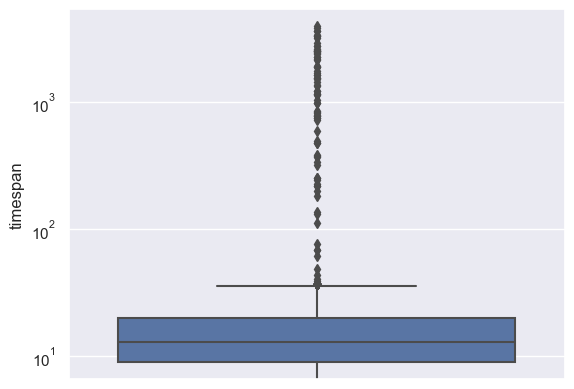

In [65]:
sns_ax = sns.boxplot(y = to_trending[0])
_ = sns_ax.set(yscale = "log")
plt.show()

### Reflection

As we can see, most videos take less a 100 days to reach the trending page. This can be attributed to viral natural of content on the internet, that if some online content is popular, it will often be shared and viewed within it’s short time span of relevancy.

## From which category do users like videos more?

In [67]:
temp = combined_df
temp = temp.groupby('category')[['views','likes']].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes',ascending=False)
temp.head()

,views,likes
category,,
Entertainment,17588672171,471875260
Music,18175195668,444810351
Comedy,4573398180,218752102
People & Blogs,5606736781,157767436
Howto & Style,2215633882,77250724


### Reflection

As expected, the most liked category is ‘Entertainment’ for all countries. This shows user preference to use YouTube as an entertainment platform.

## On which category do users comment the most?

In [68]:
temp = combined_df
temp = temp.groupby('category')[['comment_count']].sum()
temp = temp.sort_values(by='comment_count',ascending=False)
temp.head()

,comment_count
category,
Entertainment,68370777
Music,36232007
People & Blogs,24662982
Comedy,23294917
News & Politics,14956906


## Correlation between views, likes, dislikes, and comments

In [69]:
col = ['views', 'likes', 'dislikes', 'comment_count']
corr = combined_df[col].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.768352,0.378172,0.423572
likes,0.768352,1.000000,0.435397,0.700513
dislikes,0.378172,0.435397,1.000000,0.667473
comment_count,0.423572,0.700513,0.667473,1.000000


In [70]:
corr.style.background_gradient(cmap='coolwarm')

,views,likes,dislikes,comment_count
views,1.000000,0.768352,0.378172,0.423572
likes,0.768352,1.000000,0.435397,0.700513
dislikes,0.378172,0.435397,1.000000,0.667473
comment_count,0.423572,0.700513,0.667473,1.000000


### Reflection

We can see from the results, that there is a positive relation between views and likes, likes and comment_count, dislikes and comment_count. We came to this conclusion as anytime the correlation coefficient, denoted as corr, is greater than zero, it’s a positive relationship.